# Data Visualization

## Matplotlib

### Exercise 7  
Do the same as exercise 6, but using Plotly Express.

In [1]:
#from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "all"

#### 6.1 Redo Exercise 3 with Plotly Express
This exercise uses the derived data created in level 7, exercise 12. You should do the following:  
a. Plot the volume-weighted average daily returns using a line chart.  
b. Plot the moving average daily return in a separate line chart. Try using different moving windows and a gaussian smoother to see what gives you the best line without losing too
much granularity.  
c. Overlay the plots from a and b.  
d. Plot the moving average volume on the same plot.  

In [1]:
import pandas as pd

# Load data
%store -r dataDaily
hist = dataDaily
hist.tail()

,Date,Ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume,Daily Return,1-week MA Daily Return,Rolling Cumulative Volume
3906316,2020-10-30,ZBH,132.100006,0.00,134.820007,130.050003,133.490005,0.0,1256400.0,0.415408,0.863042,1.811094e+13
3906317,2020-10-30,ZBRA,283.640015,0.00,290.970001,281.019989,290.000000,0.0,304300.0,1.147161,1.003142,1.811095e+13
3906318,2020-10-30,ZION,32.270000,0.00,32.310001,31.240000,31.330000,0.0,1732100.0,-0.886229,0.952237,1.811095e+13
3906319,2020-10-30,ZTS,158.550003,0.00,161.320007,156.250000,160.020004,0.0,2078300.0,3.913232,0.932121,1.811095e+13
3906320,2020-11-02,MET,NaN,0.46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [2]:
scaffoldPortfolio = pd.read_csv('scaffoldPortfolio_data.csv', index_col=0)
scaffoldPortfolio

,Date,Ticker,Position,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,...,Open,Stock Splits,Volume,Daily Return,1-week MA Daily Return,Rolling Cumulative Volume,Daily P&L,Cumulative Daily P&L,Cumulative Daily Portfolio P&L,Yield
0,2018-01-10,MMM,15000.0,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,...,220.860454,0.0,1640900.0,1.876795,0.350461,1.640580e+13,28151.927647,2.815193e+04,28151.927647,1.876795
0,2018-01-11,ABT,20000.0,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800.0,...,56.042228,0.0,4240900.0,-0.731959,0.201628,1.640660e+13,-14639.173012,-1.463917e+04,13797.058990,-0.731959
1,2018-01-11,MMM,15000.0,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,...,220.622226,0.0,1487700.0,1.895749,0.353683,1.640774e+13,28436.232002,5.658816e+04,13797.058990,1.895749
0,2018-01-12,ABT,20000.0,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800.0,...,56.338434,0.0,6320900.0,-0.738628,0.205469,1.640853e+13,-14772.556368,-2.941173e+04,13664.861844,-0.738628
1,2018-01-12,MMM,15000.0,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,...,222.757511,0.0,1974300.0,1.895828,0.356432,1.640979e+13,28437.418212,8.502558e+04,13664.861844,1.895828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020-01-10,AMZN,6000.0,Amazon.com Inc.,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724.0,...,1905.369995,0.0,2853700.0,7.267550,1.952383,1.747607e+13,43605.302282,2.739225e+07,86826.035921,7.267550
4,2020-01-10,MMM,42000.0,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,...,176.605104,0.0,2103800.0,0.598660,0.252569,1.747692e+13,25143.699270,2.156141e+07,86826.035921,0.598660
5,2020-01-10,SCHW,0.0,Charles Schwab Corporation,reports,Financials,Investment Banking & Brokerage,"San Francisco, California",1997-06-02,316709.0,...,47.448014,0.0,7452900.0,-0.469068,0.057612,1.747724e+13,NaN,-5.382023e+05,86826.035921,NaN
6,2020-01-10,YUM,0.0,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061.0,...,101.243774,0.0,1462400.0,0.266653,0.134937,1.747750e+13,NaN,8.360253e+05,86826.035921,NaN


In [ ]:
import plotly.express as px
from scipy.ndimage import gaussian_filter

aaplData = hist[hist['Ticker']=='AAPL']
aaplData['Smoothed 1-week MA Daily Return'] = gaussian_filter(aaplData['1-week MA Daily Return'], 8)  # smoothing factor sigma = 8

#color is basically a groupby
fig = px.line(aaplData, x='Date', y=['Daily Return', 'Smoothed 1-week MA Daily Return', 'Rolling Cumulative Volume'], color='Ticker', width=1000, height=500)

fig.show()

# Add figure title
fig.update_layout(
    title_text="AAPL Data",
    )

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Daily <b>Return</b>", secondary_y=False)
fig.update_yaxes(title_text="Rolling Cumulative <b>Volume</b>", secondary_y=True)

fig.show()

<ipython-input-4-3149b7ba3a6a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 6.2 Redo Exercise 4 with PLotly
This exercise uses the derived data created in level 7, exercise 12. You should do the following:  
a. Plot the distribution of daily volume using a histogram. Pick the ideal number of bins.  
b. Plot the distribution of daily volume for each of the two years, using a histogram. You should have two overlaying histograms on the same plot.  

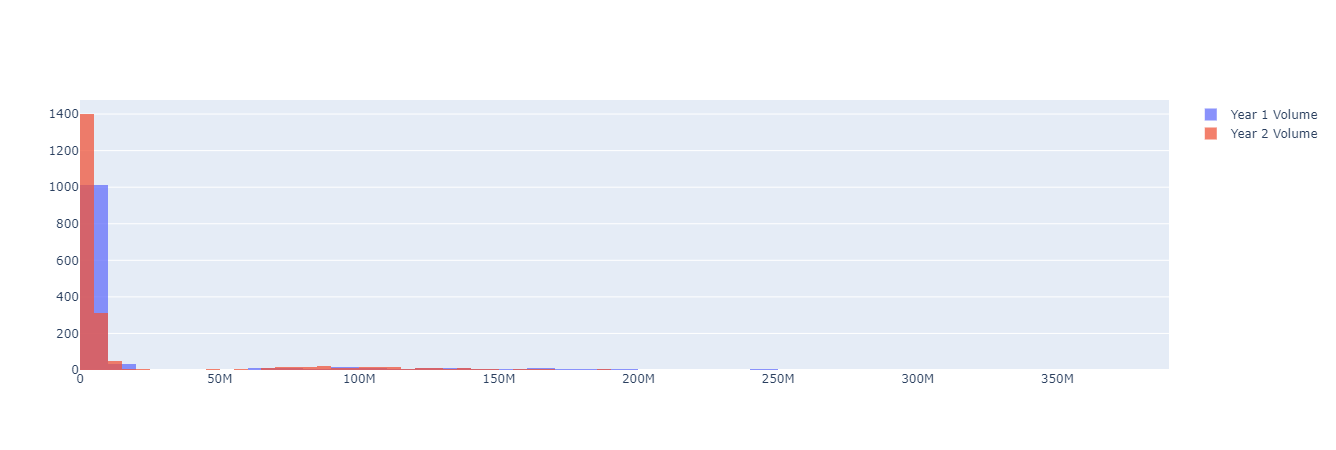

In [5]:
y1 = scaffoldPortfolio[scaffoldPortfolio['Date'] < '2019-01-01']
y2 = scaffoldPortfolio[scaffoldPortfolio['Date'] >= '2019-01-01']

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=y1['Volume'], name='Year 1 Volume'))
fig.add_trace(go.Histogram(x=y2['Volume'], name='Year 2 Volume'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### 6.3 Redo Exercise 5 using Plotly
This exercise uses the derived data created in level 7, exercise 13. You should do the following:  
a. Plot cumulative PnL for each ticker from your portfolio, on the same plot. Hint: Use DataFrame pivoting functionality.  
b. Create a scatter plot of PnL per ticker, year 1 vs year 2. Use different color points for each ticker, and use alpha as appropriate. 

##### 6.3.a. Plot cumulative PnL for each ticker from your portfolio, on the same plot. Hint: Use DataFrame pivoting functionality.

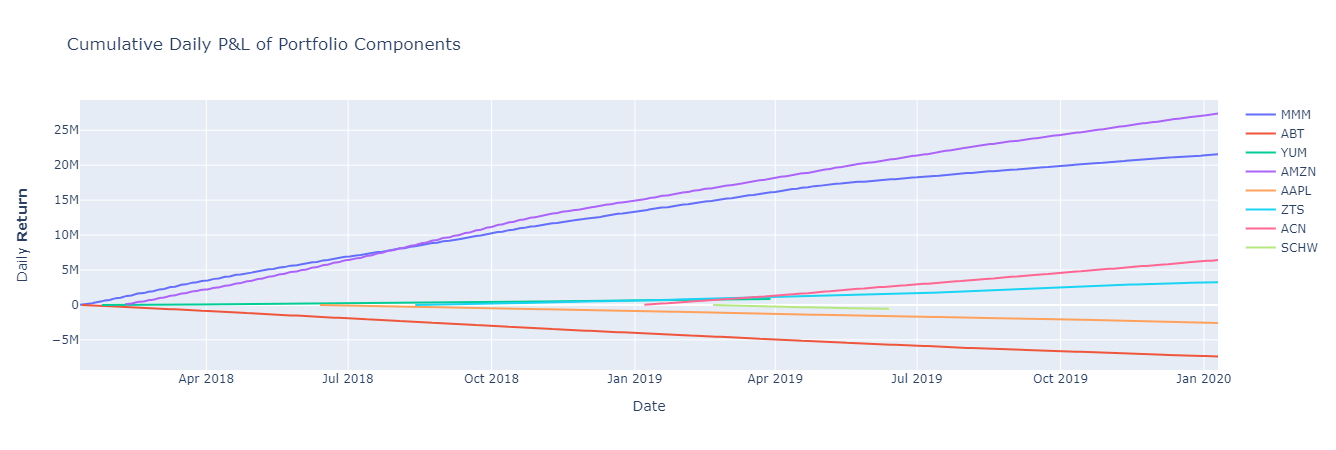

In [11]:
fig = make_subplots()

for ticker in scaffoldPortfolio.Ticker.unique():
    data = scaffoldPortfolio[scaffoldPortfolio.Ticker == ticker]
    fig.add_trace(
        go.Scatter(x=data['Date'], y=data['Cumulative Daily P&L'], name=ticker),
        secondary_y=False,
        )

# Add figure title
fig.update_layout(
    title_text="Cumulative Daily P&L of Portfolio Components",
    )

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Daily <b>Return</b>", secondary_y=False)

fig.show()

##### 6.3.b. Create a scatter plot of PnL per ticker, year 1 vs year 2. Use different color points for each ticker, and use alpha as appropriate.

In [12]:
scaffoldPortfolio = scaffoldPortfolio.reset_index()
scaffoldPortfolio.dropna(thresh=1, subset=['Daily P&L'], inplace=True)

In [21]:
cutOffdate = '2019-01-11'

y1 = scaffoldPortfolio[scaffoldPortfolio['Date'] < cutOffdate]
y2 = scaffoldPortfolio[scaffoldPortfolio['Date'] >= cutOffdate]

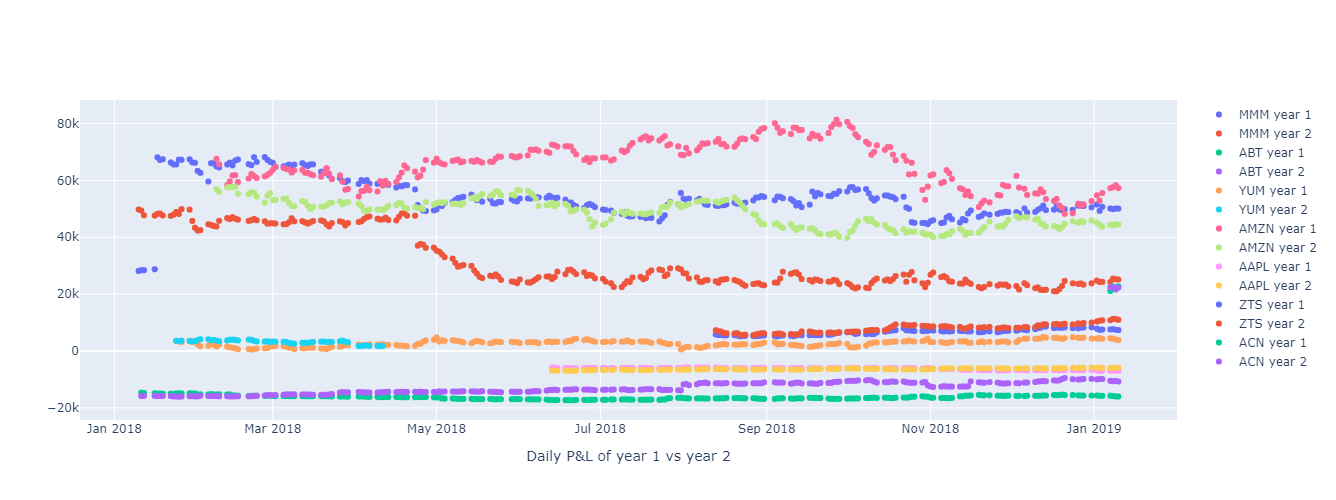

In [28]:
# Create figure with secondary y-axis
fig = make_subplots()

for ticker in scaffoldPortfolio.Ticker.unique():
    data_y1 = y1[y1.Ticker == ticker]
    data_y2 = y2[y2.Ticker == ticker]
    fig.add_trace(
        go.Scatter(x=data_y1['Date'], y=data_y1['Daily P&L'], name=(ticker + ' year 1'), mode='markers'),
        secondary_y=False,
        )
    fig.add_trace(
        go.Scatter(x=data_y1['Date'], y=data_y2['Daily P&L'], name=(ticker + ' year 2'), mode='markers'),
        secondary_y=False,
        )
    
# Add figure title
fig.update_layout(
    height=500, width=1000
)

# Set x-axis title
fig.update_xaxes(title_text="Daily P&L of year 1 vs year 2")


fig.show(width=1500, height=1000)

**Remarks RE: Plotly vs Matplotlib**
1. Besides the obvious benefits offered by an interactive charting experience, it is evident that Plotly is much more efficient at charting than Matplotlib.  
2. The code to plot using Plotly is also a lot more straight forward and appears to be less 'hacky' than Matplotlib. Likely easier to maintain as well.    
3. Matplotlib run into data size issues when plotting scatter plots comparing Year 1 and Year 2. This is not the case with Plotly. It figures out what to plot and compare on its own.